## Jupyter Data Science Workflow

### From exploratory analysis to reproducible science

#### Martin Reilly

#### %matplotlib inline tells the notebook to put any plots in the notebook itself rather that in seperate windows
###### Also changing the style of the plots away from the default %matplotlib style to 'seaborn', note defaults will return once you restart Jupyter Notebook

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
from fremont_packages.data import get_fremont_data

In [3]:
data = get_fremont_data()
data.head()

,East,West,Total
Date,,,
2019-01-01 00:00:00,0.0,9.0,9.0
2019-01-01 01:00:00,2.0,22.0,24.0
2019-01-01 02:00:00,1.0,11.0,12.0
2019-01-01 03:00:00,1.0,2.0,3.0
2019-01-01 04:00:00,2.0,1.0,3.0


### we can use data.plot() just to see what pandas shows us here
#### you can see the data is a little dense, they are hourly counts over 6 years including Total

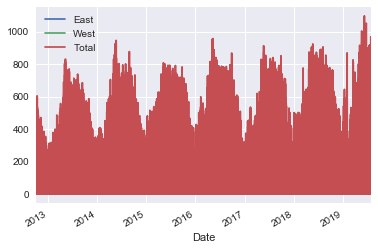

In [4]:
data.plot()

#### To see it a little better we can resample weekly and take the sum - we are going to take the total number of rides each week over the course of these years.

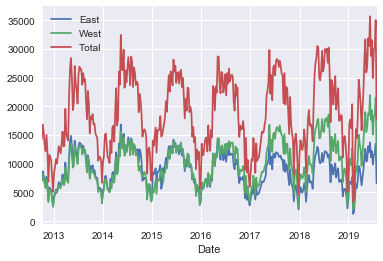

In [5]:
data.resample('W').sum().plot();

#### To see if there are trends like annual growth or decline in ridership we can do a rolling window
##### Lets resample daily and do a rolling sum over 365 days and what comes out is the annual trend

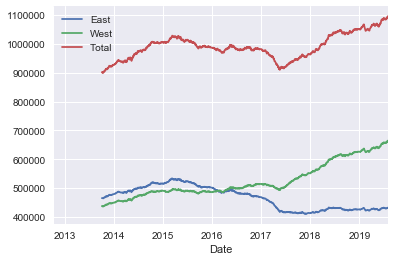

In [6]:
data.resample('D').sum().rolling(365).sum().plot();

#### These axes limits are a little bit suspect because they do not go all the way to zero.
#### If might be better if we can set the Y limit from 0 to None (use the current maximum). This will allow us to better see what's going on

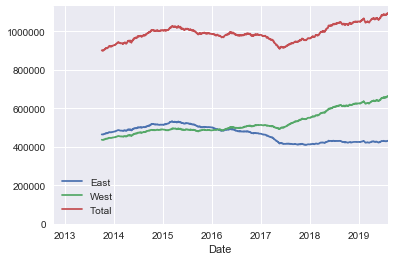

In [7]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

##### We can take a look at the trend within individual days, use grouping and the daily mean. Note: the index was set to date earlier using pandas

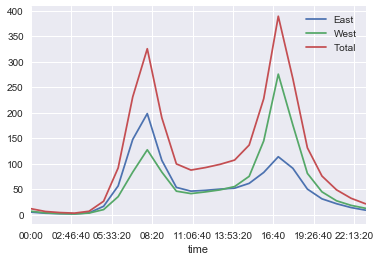

In [8]:
data.groupby(data.index.time).mean().plot();

### People going into the city on the east side in the morning and out of the city on the west side in the afternoon

### This average is nice but it would also be nice to see the whole data set in this way, and one way we can do that is by using a Pivot Table

#### Lets look at the first 5 by 5 block of the pivot table
##### Each column is a day in the dataset and each row corresponds to an hour during that day

In [9]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


#### Lets take a look at the pivot table
##### We have a line for each day of the 6 years

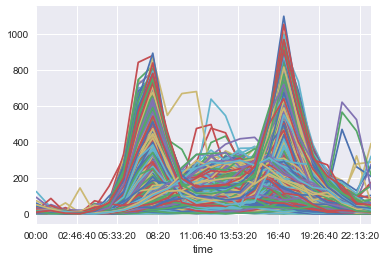

In [10]:
pivoted.plot(legend=False);

#### Lets introduce the transparancy where we plot a whole lot of transtarant lines on top or each other to get a trent in crossings of the day changes throughout this six year period

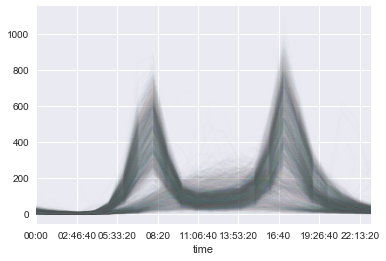

In [11]:
pivoted.plot(legend=False, alpha=0.01);

##### Now you see there are a bunch of days that have this bimodal commute pattern but there are days that do not have the commute pattern, they peak during mid-day and go down over the rest of the day. The best hypothesis is work days vrs week days/holidays